In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from pathlib import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
%matplotlib inline

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

### Preprocessing

In [45]:
# Load data
file_path = Path("data/camel_data_after2010Q3.csv")
banks_df = pd.read_csv(file_path, index_col=0)
banks_df.describe()

,Target,EQTA,EQTL,LLRTA,LLRGL,OEXTA,INCEMP,ROA,ROE,TDTL,TDTA,TATA
count,7020.000000,7020.000000,7020.000000,7020.000000,7020.000000,7020.000000,7014.000000,7020.000000,7020.000000,7020.000000,7020.000000,7020.000000
mean,0.019516,0.107825,8.025950,0.012320,0.021934,0.024020,33.658510,0.002020,-0.234058,44.756417,0.835683,0.176412
std,0.138338,0.048877,573.594468,0.009366,0.160890,0.030903,1156.779875,0.015031,11.397990,3147.677966,0.080119,0.142363
min,0.000000,-0.160659,-0.195857,0.000000,0.000000,-0.012004,-3639.467742,-0.295750,-887.458333,0.000000,0.000000,0.000000
25%,0.000000,0.087487,0.125263,0.007216,0.012119,0.018253,3.084559,0.000907,0.009412,1.126635,0.805493,0.066298
50%,0.000000,0.101018,0.156656,0.010040,0.015915,0.022036,18.162698,0.004832,0.045176,1.273882,0.850135,0.148018
75%,0.000000,0.121013,0.212105,0.014293,0.022124,0.026400,34.348039,0.008417,0.078245,1.527407,0.883593,0.258563
max,1.000000,0.968116,47829.250000,0.161906,12.250000,2.164806,73600.000000,0.173673,21.963100,260238.500000,1.151905,0.868327


Check if there are any missing values

In [46]:
banks_df.isnull().values.any()

True

Count the missing values and consider different mitigation strategies

In [47]:
banks_df.isnull().sum().sum()

6

Only 6 instances have missing data, thus drop raws

In [48]:
banks_df.dropna(inplace=True)

Count the features of failed banks (Target of 1)

In [49]:
banks_df.loc[banks_df.Target == 1].count()

AsOfDate    137
Target      137
EQTA        137
EQTL        137
LLRTA       137
LLRGL       137
OEXTA       137
INCEMP      137
ROA         137
ROE         137
TDTL        137
TDTA        137
TATA        137
dtype: int64

Take a copy of predictors and store in X, count all instances available.

In [52]:
X = banks_df[['EQTA', 'EQTL', 'LLRTA', 'LLRGL', 'OEXTA', 'INCEMP', 'ROA', 'ROE', 'TDTL', 'TDTA', 'TATA']].copy()
len(X)

7014

Define the target vector y, reshape as well.

In [55]:
y = banks_df["Target"].values.reshape(-1, 1)

## Naive model

In [59]:
naive_model = GradientBoostingClassifier().fit(X, y.ravel())
print("Prediction accuracy is {0:.5f}".format(accuracy_score(y.ravel(), naive_model.predict(X))))

Prediction accuracy is 0.99601


In [60]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaler, i.e. remove the mean and scaling to unit variance
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Choose best learning rate

In [61]:
# Iterate over learning rate to identify the best classifier learning rate
learning_rates = [0.03, 0.06, 0.07, 0.1, 0.25, 0.5, 0.75, 1]


### Create Gradient Boosting Classifier

In [77]:
#Represent Precision and Recall graphically
def plot_precision_recall(precisions, recalls, thresholds):

    plt.plot(thresholds, precisions[: -1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[: -1], 'g-', label='Recall')
    plt.ylabel('Precision/Recall')
    plt.xlabel('Threshold')
    plt.legend(loc='center left')
    plt.ylim([0,1])
    plt.show()
    

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Negatove Rate')

In [78]:
# Choose a learning rate and create the classifier
for rate in learning_rates:
    clf = GradientBoostingClassifier(n_estimators=20,
                                     learning_rate=rate,
                                     max_features=5,
                                     max_depth=3,
                                     random_state=0
    )

# Fit the model
    clf.fit(X_train_scaled, y_train.ravel()) # dont forget to flatten the y array
    predictions = clf.predict(X_test_scaled)
    
    
    
    print("For learning rate of {0:.6f}".format(rate))
    # Make Prediction
    print("Training accuracy is {0:.3f}".format(clf.score(X_train_scaled, y_train.ravel())))
    print("Testing accuracy is {0:.3f}". format(clf.score(X_test_scaled, y_test.ravel())))
    print("Prediction accuracy is {0:.5f}".format(accuracy_score(y_test, predictions)))
    print()


For learning rate of 0.030000
Training accuracy is 0.982
Testing accuracy is 0.985
Prediction accuracy is 0.98518

For learning rate of 0.060000
Training accuracy is 0.993
Testing accuracy is 0.987
Prediction accuracy is 0.98746

For learning rate of 0.070000
Training accuracy is 0.994
Testing accuracy is 0.988
Prediction accuracy is 0.98803

For learning rate of 0.100000
Training accuracy is 0.994
Testing accuracy is 0.987
Prediction accuracy is 0.98746

For learning rate of 0.250000
Training accuracy is 0.993
Testing accuracy is 0.985
Prediction accuracy is 0.98461

For learning rate of 0.500000
Training accuracy is 0.983
Testing accuracy is 0.984
Prediction accuracy is 0.98404

For learning rate of 0.750000
Training accuracy is 0.982
Testing accuracy is 0.981
Prediction accuracy is 0.98119

For learning rate of 1.000000
Training accuracy is 0.983
Testing accuracy is 0.985
Prediction accuracy is 0.98461



### Validation Curve: Precision/Recall and ROC/AUC

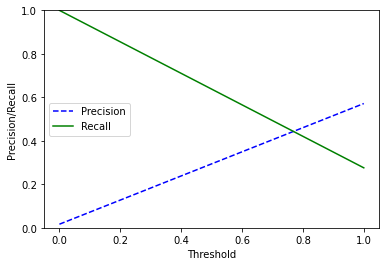

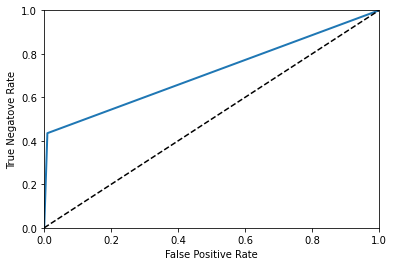

In [79]:
from sklearn.model_selection import validation_curve
from sklearn.metrics import roc_curve
y_scores = cross_val_predict(clf, X_train_scaled, y_train.ravel(), cv=3)
precisions, recalls, thresholds = precision_recall_curve(y_test, predictions)
plot_precision_recall(precisions, recalls, thresholds)
false_positive, true_negative, thresholds = roc_curve(y_train, y_scores)
plot_roc_curve(false_positive, true_negative)

### Grid Search

In [365]:
from sklearn.model_selection import GridSearchCV

param_grid = {'learning_rate': [0.05, 0.1, 0.2, 0.5, 0.7, 0.8, 1], 
             "n_estimators" : [10, 30, 50],
              "max_features": [2, 3, 4, 5],
              "max_depth" : [2, 3, 4]
             
             
             } 

grid = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=7)

grid.fit(X, y.ravel());

grid.best_params_

{'learning_rate': 0.2, 'max_depth': 2, 'max_features': 2, 'n_estimators': 20}

### The best model

In [459]:
# Calculating the accuracy score
clf_best = GradientBoostingClassifier(n_estimators=20,
                                     learning_rate=0.2,
                                     max_features=2,
                                     max_depth=2,
                                     random_state=0
    )
clf_best.fit(X_train_scaled, y_train.ravel())
#{'learning_rate': 0.2, 'max_depth': 2, 'max_features': 2, 'n_estimators': 20}
predictions = clf_best.predict(X_test_scaled)
pd.DataFrame({"Prediction": predictions, "Actual": y_test.ravel()}).head(5)

,Prediction,Actual
0,0,1
1,0,0
2,0,1
3,0,0
4,0,0


In [460]:
# Important: double check the best model with cross validation 
from sklearn.model_selection import cross_val_score 
scores = cross_val_score(clf_best, X, y.ravel(), cv=10)
scores.mean()

0.586

In [461]:
# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)
print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.592


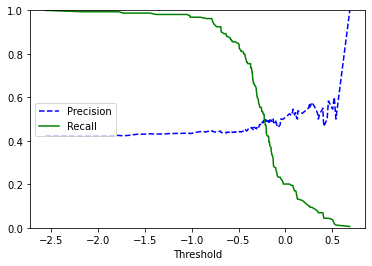

In [468]:
y_scores = cross_val_predict(clf_best, X_train_scaled, y_train.ravel(), cv=3, method='decision_function')
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

plot_precision_recall(precisions, recalls, thresholds)
plt.show()

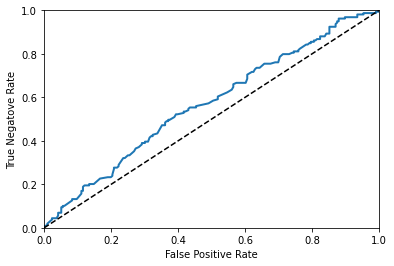

In [469]:
fpr, tpr, thresholds = roc_curve(y_train, y_scores)
plot_roc_curve(fpr, tpr)
plt.show()

In [411]:
# Generate the confusion matrix
pd.DataFrame(confusion_matrix(y_test, predictions), index=["Pred 0", "Pred 1"], columns=["Actual 1", "Actual 0"])

,Actual 1,Actual 0
Pred 0,66,18
Pred 1,33,8


In [412]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, predictions)

-0.022167059799599678

In [413]:
# Generate classification report
print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.67      0.79      0.72        84
           1       0.31      0.20      0.24        41

    accuracy                           0.59       125
   macro avg       0.49      0.49      0.48       125
weighted avg       0.55      0.59      0.56       125



#### Checking learning_rate = 0.75 results

In [415]:
# Calculating the accuracy score
clf_benchmark = GradientBoostingClassifier(n_estimators=20,
                                     learning_rate=0.75,
                                     max_features=5,
                                     max_depth=3,
                                     random_state=0
    )
clf_benchmark.fit(X_train_scaled, y_train.ravel())

# Make Prediction
predictions = clf_benchmark.predict(X_test_scaled)
# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)
print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.568


In [416]:
# Generate the confusion matrix
#confusion_matrix = confusion_matrix(y_test, y_pred)
cm = confusion_matrix(y_test, predictions)
confusion_matrix_df = pd.DataFrame(
    cm, 
    columns=['Actual 0', 'Actual 1'], index=['Pred 0', 'Pred 1'])
display(confusion_matrix_df)

,Actual 0,Actual 1
Pred 0,52,32
Pred 1,22,19


In [417]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, predictions)

0.07877453001099935

In [418]:
# Generate classification report
print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.70      0.62      0.66        84
           1       0.37      0.46      0.41        41

    accuracy                           0.57       125
   macro avg       0.54      0.54      0.54       125
weighted avg       0.59      0.57      0.58       125



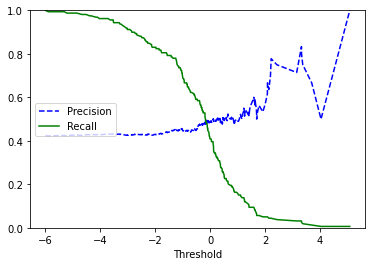

In [471]:
y_scores = cross_val_predict(clf_benchmark, X_train_scaled, y_train.ravel(), cv=3, method='decision_function')
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

plot_precision_recall(precisions, recalls, thresholds)
plt.show()

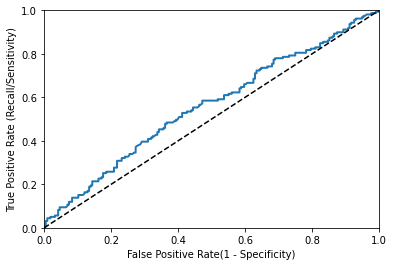

In [472]:
fpr, tpr, thresholds = roc_curve(y_train, y_scores)
plot_roc_curve(fpr, tpr)
plt.show()